# Import stock data

To begin with I'm going to pick a well known stock, from the FTSE100.
I've chosen Barclay's (ticker: BARC), purely at random.

The next step is to import historic pricing data.
To do this we can use ~~Google or Yahoo, via Pandas_datareader~~ Alpha Vantage, as Google/Yahoo no longer work properly.

In [1]:
from alpha_vantage.timeseries import TimeSeries
import my_api
key = my_api.key
ts = TimeSeries(key=key, output_format='pandas')

In [2]:
data, meta_data = ts.get_daily_adjusted(symbol='BARC.L', outputsize='full')

In [3]:
data.head()

,2. high,5. adjusted close,1. open,8. split coefficient,4. close,6. volume,3. low,7. dividend amount
date,,,,,,,,
2000-01-03,411.528,220.3322,411.528,1.0,411.528,0.0,411.528,0.0
2000-01-04,411.759,206.4840,411.528,1.0,385.663,279934682.0,384.509,0.0
2000-01-05,387.511,201.5385,387.049,1.0,376.426,257475840.0,374.117,0.0
2000-01-06,383.354,193.9963,383.354,1.0,362.339,504884346.0,360.260,0.0
2000-01-07,373.020,189.6687,357.951,1.0,354.256,553699695.0,349.291,0.0


# Check out the data
The next step is to take a look at the data, looking for obvious trends, outliers or anything unusual, such as data quality issues.

In [4]:
data.describe()

,2. high,5. adjusted close,1. open,8. split coefficient,4. close,6. volume,3. low,7. dividend amount
count,4612.000000,4612.000000,4612.000000,4612.0,4612.000000,4.612000e+03,4612.000000,4612.0
mean,360.156528,260.705408,355.007272,1.0,354.702189,9.133801e+07,349.486267,0.0
std,150.472791,86.762953,149.699576,0.0,149.551072,1.390489e+08,148.658420,0.0
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000,0.0
25%,236.172500,207.318400,233.000000,1.0,232.512500,3.009188e+07,229.924500,0.0
50%,321.856000,242.847300,314.073000,1.0,312.803500,4.499499e+07,305.067000,0.0
75%,488.430000,293.173825,482.252750,1.0,482.021750,7.416415e+07,475.324750,0.0
max,733.453000,523.657000,732.530000,1.0,729.758000,2.716864e+09,726.987000,0.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

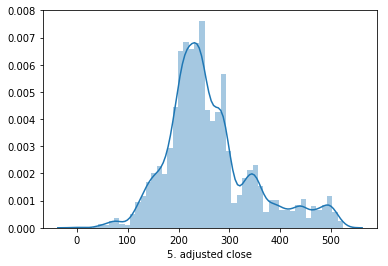

In [6]:
sns.distplot(data['5. adjusted close'])
plt.show()

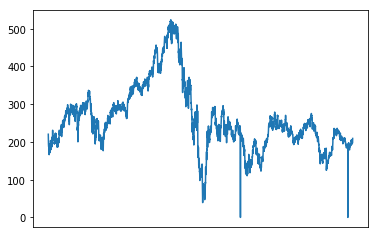

In [7]:
plt.plot(data.index, data['5. adjusted close'], linestyle='solid')
plt.xticks([])
plt.show()

## Missing data?
There are two unusual points on the graph which show a distinct drop to zero. Looks to me like some missing data... 

In [20]:
missing_data = data[data['5. adjusted close'] == 0]
missing_data

,2. high,5. adjusted close,1. open,8. split coefficient,4. close,6. volume,3. low,7. dividend amount
date,,,,,,,,
2011-04-29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2017-10-06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
import pandas as pd
data.index = pd.to_datetime(data.index, format="%Y-%m-%d")
missing_data = data[data['5. adjusted close'] == 0]

In [29]:
[d.weekday() for d in missing_data.index.tolist()]

[4, 4]

Both of these dates occur on Friday (0123456 => mtwtfss). 
The missing data can be found from yahoo finance and from the Barclays investors page.
The source of the missing data is most likely due to the data supplied by Alpha Vantage. 
The missing values could be removed or filled in with the average of the two days preceeding and following.